<a href="https://colab.research.google.com/github/shareefat/Deep_learning_Projects/blob/main/intel_image_classification_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets



In [3]:
import opendatasets as op
op.download('https://www.kaggle.com/datasets/puneet6060/intel-image-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammedshareefat
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification


100%|██████████| 346M/346M [00:02<00:00, 130MB/s]


In [10]:
import os
datapath= ('/content/intel-image-classification/seg_train/seg_train')
categories=os.listdir(datapath)

In [14]:
data = []
labels = []

for category in categories:
  folder_path = os.path.join(datapath, category)
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    data.append(file_path)
    labels.append(category)

In [15]:

print(data[:5], labels[:5])

['/content/intel-image-classification/seg_train/seg_train/forest/16778.jpg', '/content/intel-image-classification/seg_train/seg_train/forest/4690.jpg', '/content/intel-image-classification/seg_train/seg_train/forest/4258.jpg', '/content/intel-image-classification/seg_train/seg_train/forest/3172.jpg', '/content/intel-image-classification/seg_train/seg_train/forest/8208.jpg'] ['forest', 'forest', 'forest', 'forest', 'forest']


In [19]:
label_map={}
for id, category in enumerate(categories):
  label_map[category]=id

In [20]:
label_map

{'forest': 0,
 'buildings': 1,
 'glacier': 2,
 'street': 3,
 'mountain': 4,
 'sea': 5}

In [21]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

def preprocess_image(data):
  img = load_img(data,target_size = (150,150))
  img_array = img_to_array(img)
  img_array = img_array/255.0
  return img_array


In [22]:
import numpy as np
y = []
for i in labels:
  y.append(label_map[i])
y = np.array(y)
y[:5]

array([0, 0, 0, 0, 0])

In [23]:
data

['/content/intel-image-classification/seg_train/seg_train/forest/16778.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/4690.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/4258.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/3172.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/8208.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/1261.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/17454.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/18363.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/9751.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/3811.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/17183.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/4293.jpg',
 '/content/intel-image-classification/seg_train/seg_train/forest/18431.jpg',
 '/cont

In [24]:
x = []
for img in data:
  x.append(preprocess_image(img))
x = np.array(x)
x[:5]

array([[[[0.3137255 , 0.42745098, 0.23921569],
         [0.24705882, 0.3764706 , 0.16862746],
         [0.38431373, 0.5411765 , 0.29803923],
         ...,
         [0.3019608 , 0.41960785, 0.30980393],
         [0.5019608 , 0.6       , 0.5254902 ],
         [0.16862746, 0.25490198, 0.20392157]],

        [[0.11764706, 0.23137255, 0.05098039],
         [0.31764707, 0.44313726, 0.2509804 ],
         [0.23529412, 0.37254903, 0.15294118],
         ...,
         [0.25882354, 0.38039216, 0.25882354],
         [0.56078434, 0.654902  , 0.6       ],
         [0.07843138, 0.16078432, 0.13333334]],

        [[0.01960784, 0.14117648, 0.        ],
         [0.21176471, 0.3254902 , 0.15294118],
         [0.19215687, 0.29803923, 0.13725491],
         ...,
         [0.3019608 , 0.42352942, 0.2901961 ],
         [0.50980395, 0.6       , 0.5764706 ],
         [0.02745098, 0.10196079, 0.12941177]],

        ...,

        [[0.22352941, 0.3647059 , 0.1254902 ],
         [0.2901961 , 0.43137255, 0.1882353 ]

In [25]:
x.shape

(14034, 150, 150, 3)

In [34]:
y.shape

(14034,)

<function matplotlib.pyplot.show(close=None, block=None)>

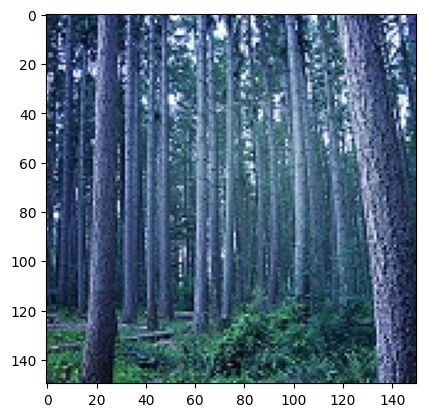

In [29]:
import matplotlib.pyplot as plt

plt.imshow(x[3])
plt.show

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
augmentator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

In [32]:
augmentator.fit(x)

In [35]:
augment=augmentator.flow(x,y)

In [41]:
print(augment[0])

(array([[[[0.5137255 , 0.47058824, 0.4862745 ],
         [0.5137255 , 0.47058824, 0.4862745 ],
         [0.5137255 , 0.47058824, 0.4862745 ],
         ...,
         [0.44313726, 0.42352942, 0.4392157 ],
         [0.44313726, 0.42352942, 0.4392157 ],
         [0.44313726, 0.42352942, 0.4392157 ]],

        [[0.5137255 , 0.47058824, 0.4862745 ],
         [0.5137255 , 0.47058824, 0.4862745 ],
         [0.5137255 , 0.47058824, 0.4862745 ],
         ...,
         [0.44313726, 0.42352942, 0.4392157 ],
         [0.44313726, 0.42352942, 0.4392157 ],
         [0.44313726, 0.42352942, 0.4392157 ]],

        [[0.5137255 , 0.47058824, 0.4862745 ],
         [0.5137255 , 0.47058824, 0.4862745 ],
         [0.5137255 , 0.47058824, 0.4862745 ],
         ...,
         [0.44313726, 0.42352942, 0.4392157 ],
         [0.44313726, 0.42352942, 0.4392157 ],
         [0.44313726, 0.42352942, 0.4392157 ]],

        ...,

        [[0.4104119 , 0.4645704 , 0.5994629 ],
         [0.342908  , 0.40264827, 0.53721267

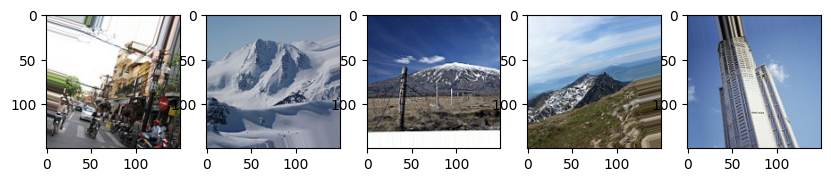

In [39]:
plt.figure(figsize=(10,10))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(augment[0][0][i])
plt.show()


#Model Creating

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D

In [46]:
model=tf.keras.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))
    ,MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(6,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.fit(x,y,epochs=10 )

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - accuracy: 0.5289 - loss: 1.1598
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 789s 2s/step - accuracy: 0.7202 - loss: 0.7521
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - accuracy: 0.7907 - loss: 0.5612
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.8291 - loss: 0.4726
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 800s 2s/step - accuracy: 0.8529 - loss: 0.4045
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.8842 - loss: 0.3225
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 801s 2s/step - accuracy: 0.9115 - loss: 0.2547
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 804s 2s/step - accuracy: 0.9305 - loss: 0.1926
Epoch 9/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 807s 2s/step - accuracy: 0.9481 - loss: 0.1489
Epoch 10/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 794s 2s/step - accuracy: 0.9542 - loss: 0.1299


In [63]:
os.chdir('/content/intel-image-classification/seg_test/seg_test')

In [64]:
test_path='/content/intel-image-classification/seg_test/seg_test'
test_categories=os.listdir(test_path)
test_categories

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']

In [67]:
test_img_path = []
y_test = []

for category in categories:
    path = os.path.join(test_path, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        test_img_path.append(img_path)
        y_test.append(category)
test_img_path[:5]


['/content/intel-image-classification/seg_test/seg_test/forest/22172.jpg',
 '/content/intel-image-classification/seg_test/seg_test/forest/23600.jpg',
 '/content/intel-image-classification/seg_test/seg_test/forest/24143.jpg',
 '/content/intel-image-classification/seg_test/seg_test/forest/23575.jpg',
 '/content/intel-image-classification/seg_test/seg_test/forest/23406.jpg']

In [70]:
y_test1=[]
for i in y_test:
  y_test1.append(label_map[i])
y_test1=np.array(y_test1)
y_test1[:5]

array([0, 0, 0, 0, 0])

In [71]:
x_test =[]
for category in test_img_path:
  x_test.append(preprocess_image(category))
x_test=np.array(x_test)
x_test[:5]

array([[[[0.14117648, 0.25490198, 0.        ],
         [0.30588236, 0.43137255, 0.05098039],
         [0.5176471 , 0.64705884, 0.23921569],
         ...,
         [0.05490196, 0.05098039, 0.04313726],
         [0.04705882, 0.04705882, 0.03921569],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.38039216, 0.49803922, 0.16078432],
         [0.36078432, 0.47058824, 0.12941177],
         [0.27058825, 0.38431373, 0.02352941],
         ...,
         [0.05098039, 0.04705882, 0.03921569],
         [0.04705882, 0.04705882, 0.03921569],
         [0.04313726, 0.04313726, 0.03529412]],

        [[0.34901962, 0.46666667, 0.18431373],
         [0.30588236, 0.40784314, 0.12941177],
         [0.27058825, 0.3372549 , 0.07058824],
         ...,
         [0.04705882, 0.04313726, 0.02745098],
         [0.04313726, 0.04705882, 0.02745098],
         [0.03529412, 0.03921569, 0.01960784]],

        ...,

        [[0.08627451, 0.12156863, 0.01568628],
         [0.13333334, 0.16470589, 0.07450981]

In [72]:
model.evaluate(x_test,y_test1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 56s 536ms/step - accuracy: 0.8597 - loss: 0.5930


[0.7136886119842529, 0.8276666402816772]

In [74]:
import numpy as np
image = preprocess_image(test_img_path[0])
image_batch = image.reshape(1,150,150,3)

prediction = model.predict(image_batch)
prediction_class = np.argmax(prediction)

class_label = list(label_map.keys())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


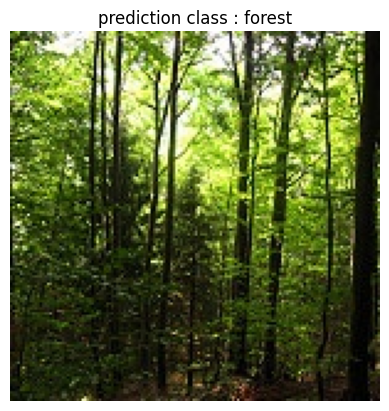

In [76]:
plt.imshow(preprocess_image(test_img_path[0]))
plt.title(f"prediction class : {class_label[prediction_class]}")
plt.axis('off')
plt.show()